7291
(7291, 257)
(7291,)
(7291, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_163 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_164 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_165 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_166 (Dense)            (None, 10)                650       
Total params: 124,106
Trainable params: 124,106
Non-trainable params: 0
_________________________________________________________________
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7291, 256)
(7291, 10)


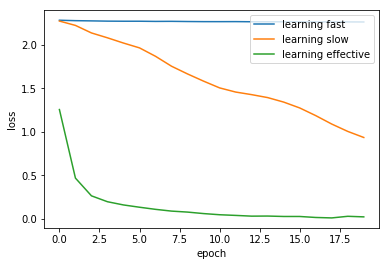

In [81]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras import utils as np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

#Loading the data from the given files
def data_load(input_file):
    data = np.loadtxt(input_file)
    print(type(data))
    y_val = data[:,0]
    x_val=np.delete(data,0,1)
    return x_val,y_val


print(len(class_label))
print(data.shape)
print(y_val.shape)
print(x_val.shape)

model1 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), kernel_initializer=keras.initializers.Constant(value=50000), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, kernel_initializer=keras.initializers.Constant(value=50000),activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), kernel_initializer=keras.initializers.Constant(value=0.5), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, kernel_initializer=keras.initializers.Constant(value=0.5),activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model3 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), kernel_initializer=keras.initializers.Constant(value=0), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, kernel_initializer=keras.initializers.Constant(value=0),activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.count_params()
len(model.layers)
model.summary()

x_train,y_train = data_load("zip_train.txt")
x_test,y_test = data_load("zip_train.txt")
y_train= np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)  

#Task2 - Part1 (fully connected network)

model_log1 = model1.fit(x_train, y_train,
          epochs=20,
          verbose=1,validation_data=(x_test, y_test))
model_log2 = model2.fit(x_train, y_train,
          epochs=20,
          verbose=1,validation_data=(x_test, y_test))
model_log3 = model3.fit(x_train, y_train,
          epochs=20,
          verbose=1,validation_data=(x_test, y_test))
        
loss1= model_log1.history['loss']
loss2= model_log2.history['loss']
loss3= model_log3.history['loss']
plt.plot(loss1)
plt.plot(loss2)
plt.plot(loss3)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['learning fast', 'learning slow','learning effective'], loc='upper right')


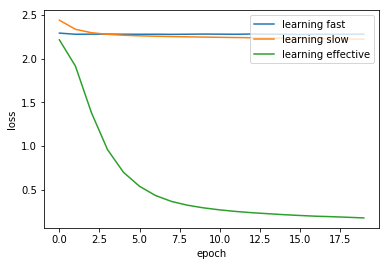

In [82]:
#Task2 - Part2 (fully connected network)
model4 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model5 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model6 = keras.Sequential([
    keras.layers.Dense(256, input_shape=(256,), activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.sigmoid),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

sgd4 = keras.optimizers.SGD(lr=0.7)
sgd5 = keras.optimizers.SGD(lr=0.0002)
sgd6 = keras.optimizers.SGD(lr=0.01)
model4.compile(optimizer=sgd4, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model5.compile(optimizer=sgd5, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.compile(optimizer=sgd6, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_log4 = model4.fit(x_train, y_train,
          epochs=20, batch_size=16,
          verbose=1,validation_data=(x_test, y_test))
model_log5 = model5.fit(x_train, y_train,
          epochs=20, batch_size=16,
          verbose=1,validation_data=(x_test, y_test))
model_log6 = model6.fit(x_train, y_train,
          epochs=20, batch_size=16,
          verbose=1,validation_data=(x_test, y_test))

loss4= model_log4.history['loss']
loss5= model_log5.history['loss']
loss6= model_log6.history['loss']
plt.plot(loss4)
plt.plot(loss5)
plt.plot(loss6)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['learning fast', 'learning slow','learning effective'], loc='upper right')